# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("cs448b_ipasn.csv", )

In [19]:
data["date"] = pd.to_datetime(data["date"])

In [21]:
data.dtypes

date     datetime64[ns]
l_ipn             int64
r_asn             int64
f                 int64
dtype: object

## Plotting f sums

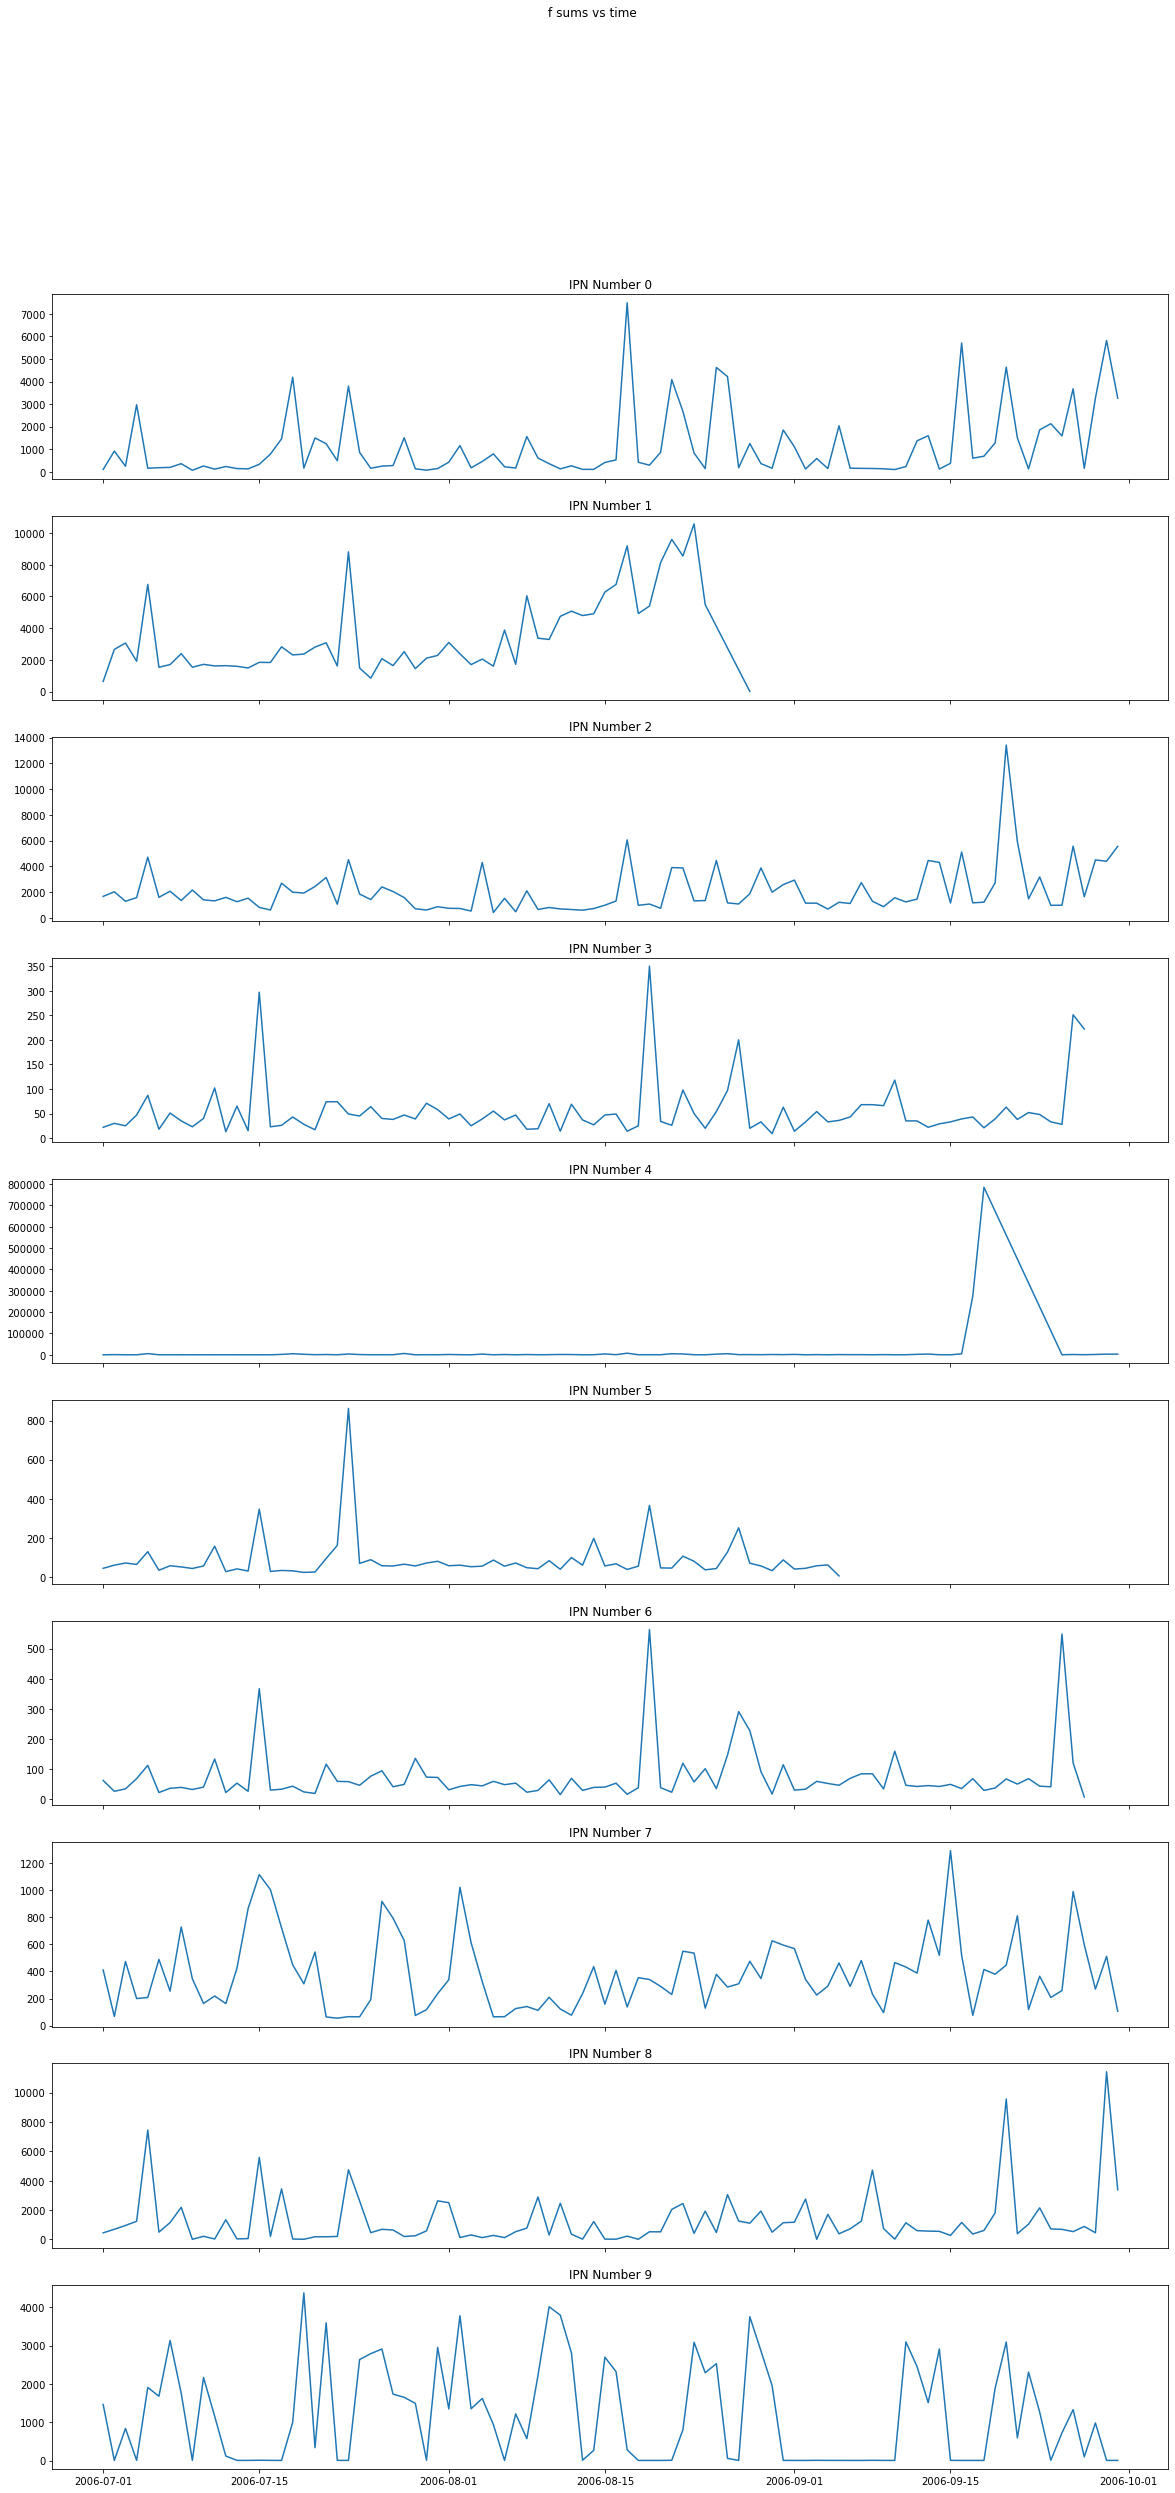

In [46]:
fig, axs = plt.subplots(10, sharex=True, figsize=(20, 40))
fig.suptitle('f sums vs time')

for ipn in range(10):
    ipn_data = data.loc[data["l_ipn"] == ipn]
    ipn_fsum = ipn_data[["date", "f"]].groupby("date").sum()
    axs[ipn].plot(ipn_fsum)
    axs[ipn].set_title('IPN Number ' + str(ipn))

### Key Observations
we know that there are 5 events of "odd" activity or suspicions. They are:
* IP 1 on 08-24
* IP 3 on 09-26
* IP 4 on 09-18
* IP 5 on 09-04
* IP 6 on 09-26

Here are the observations on those time stamps

| IP | Date | Observation |
| --- | --- | --- |
| 1 | 08-24 | From this day onwards, there is no longer any flow. Before that, a drop of around 5000 flows from the day before|
| 3 | 09-26 | From this day onwards, there is no longer any flow. Spike in flow by around 250, before a slight drop |
| 4 | 09-18 | huge spike in flow. Goes back to close to zero after|
| 5 | 09-04 | From this day onwards, there is no longer any flow. |
| 6 | 09-26 | From this day onwards, there is no longer any flow. Spike in flow by around 600, before a huge drop|



## The fateful day - when two IPs went down

In [54]:
ip_0926 = data.loc[data["date"] == "2006-09-26"]

In [58]:
ip_3 = ip_0926.loc[ip_0926["l_ipn"] == 3] 
ip_3

,date,l_ipn,r_asn,f
19879,2006-09-26,3,3462,2
19880,2006-09-26,3,4134,2
19881,2006-09-26,3,4323,1
19882,2006-09-26,3,8151,2
19883,2006-09-26,3,9584,1
19884,2006-09-26,3,9916,205
19885,2006-09-26,3,11279,2
19886,2006-09-26,3,15169,3
19887,2006-09-26,3,17464,19
19888,2006-09-26,3,17716,2


In [59]:
ip_6 = ip_0926.loc[ip_0926["l_ipn"] == 6]
ip_6

,date,l_ipn,r_asn,f
19963,2006-09-26,6,3462,2
19964,2006-09-26,6,4134,2
19965,2006-09-26,6,4323,1
19966,2006-09-26,6,8434,1
19967,2006-09-26,6,9916,79
19968,2006-09-26,6,11279,2
19969,2006-09-26,6,15169,2
19970,2006-09-26,6,17464,16
19971,2006-09-26,6,18566,6
19972,2006-09-26,6,19742,1


AHA! the abnormal flow came from the same asn, which is 9916

## Identifying Bad ASNs

In [87]:
event_1_summary = {}
ipn1 = data.loc[data["l_ipn"] == 1]
for date in data["date"].unique():
    entry = {}
    
    for idx, row in ipn1.loc[data["date"] == date].nlargest(4, 'f').iterrows():
        entry[row.r_asn] = row.f
    event_1_summary[date] = entry

print(event_1_summary)
# event_1 = data.loc[data["date"] == "2006-08-24"]
# event_1 = event_1.loc[event_1["l_ipn"] == 1]

{numpy.datetime64('2006-07-01T00:00:00.000000000'): {3265: 519, 12859: 52, 8282: 21, 4134: 9}, numpy.datetime64('2006-07-02T00:00:00.000000000'): {3265: 1611, 13749: 849, 12302: 53, 3269: 50}, numpy.datetime64('2006-07-03T00:00:00.000000000'): {3265: 1564, 3320: 1074, 12302: 190, 4513: 101}, numpy.datetime64('2006-07-04T00:00:00.000000000'): {3265: 1493, 12302: 201, 18229: 66, 3269: 20}, numpy.datetime64('2006-07-05T00:00:00.000000000'): {4766: 4405, 3265: 1469, 9800: 570, 12302: 196}, numpy.datetime64('2006-07-06T00:00:00.000000000'): {3265: 1342, 8400: 71, 3561: 10, 14777: 10}, numpy.datetime64('2006-07-07T00:00:00.000000000'): {3265: 1402, 4134: 129, 17964: 71, 3561: 19}, numpy.datetime64('2006-07-08T00:00:00.000000000'): {3265: 1353, 27696: 749, 17964: 100, 5617: 53}, numpy.datetime64('2006-07-09T00:00:00.000000000'): {3265: 1385, 6461: 36, 13571: 21, 3561: 13}, numpy.datetime64('2006-07-10T00:00:00.000000000'): {3265: 1407, 9318: 137, 6461: 45, 3561: 18}, numpy.datetime64('2006-07

In [93]:
event_1_dataframe = pd.DataFrame(columns = ipn1["date"].unique())
for date, entry in event_1_summary.items():
    if len(entry.keys()) == 4:
        event_1_dataframe[date] = entry.keys()
#     print("date: ", date)
#     for rsn, f in entry.items():
#         print(rsn, f)

In [94]:
event_1_dataframe

,2006-07-01,2006-07-02,2006-07-03,2006-07-04,2006-07-05,2006-07-06,2006-07-07,2006-07-08,2006-07-09,2006-07-10,...,2006-08-16,2006-08-17,2006-08-18,2006-08-19,2006-08-20,2006-08-21,2006-08-22,2006-08-23,2006-08-24,2006-08-28
0,3265,3265,3265,3265,4766,3265,3265,3265,3265,3265,...,3265,3265,3265,3265,33438,24940,33438,33438,3307,NaN
1,12859,13749,3320,12302,3265,8400,4134,27696,6461,9318,...,7132,31983,9583,4134,3307,33438,3307,3307,33438,NaN
2,8282,12302,12302,18229,9800,3561,17964,17964,13571,6461,...,9316,9304,14742,9318,2108,3307,2108,2108,2108,NaN
3,4134,3269,4513,3269,12302,14777,3561,5617,3561,3561,...,4134,3561,3561,3561,3265,2108,8402,3269,6746,NaN


from this, i identify the rsn 33438 as the one causing the anomaly. Lets confirm it by plotting it

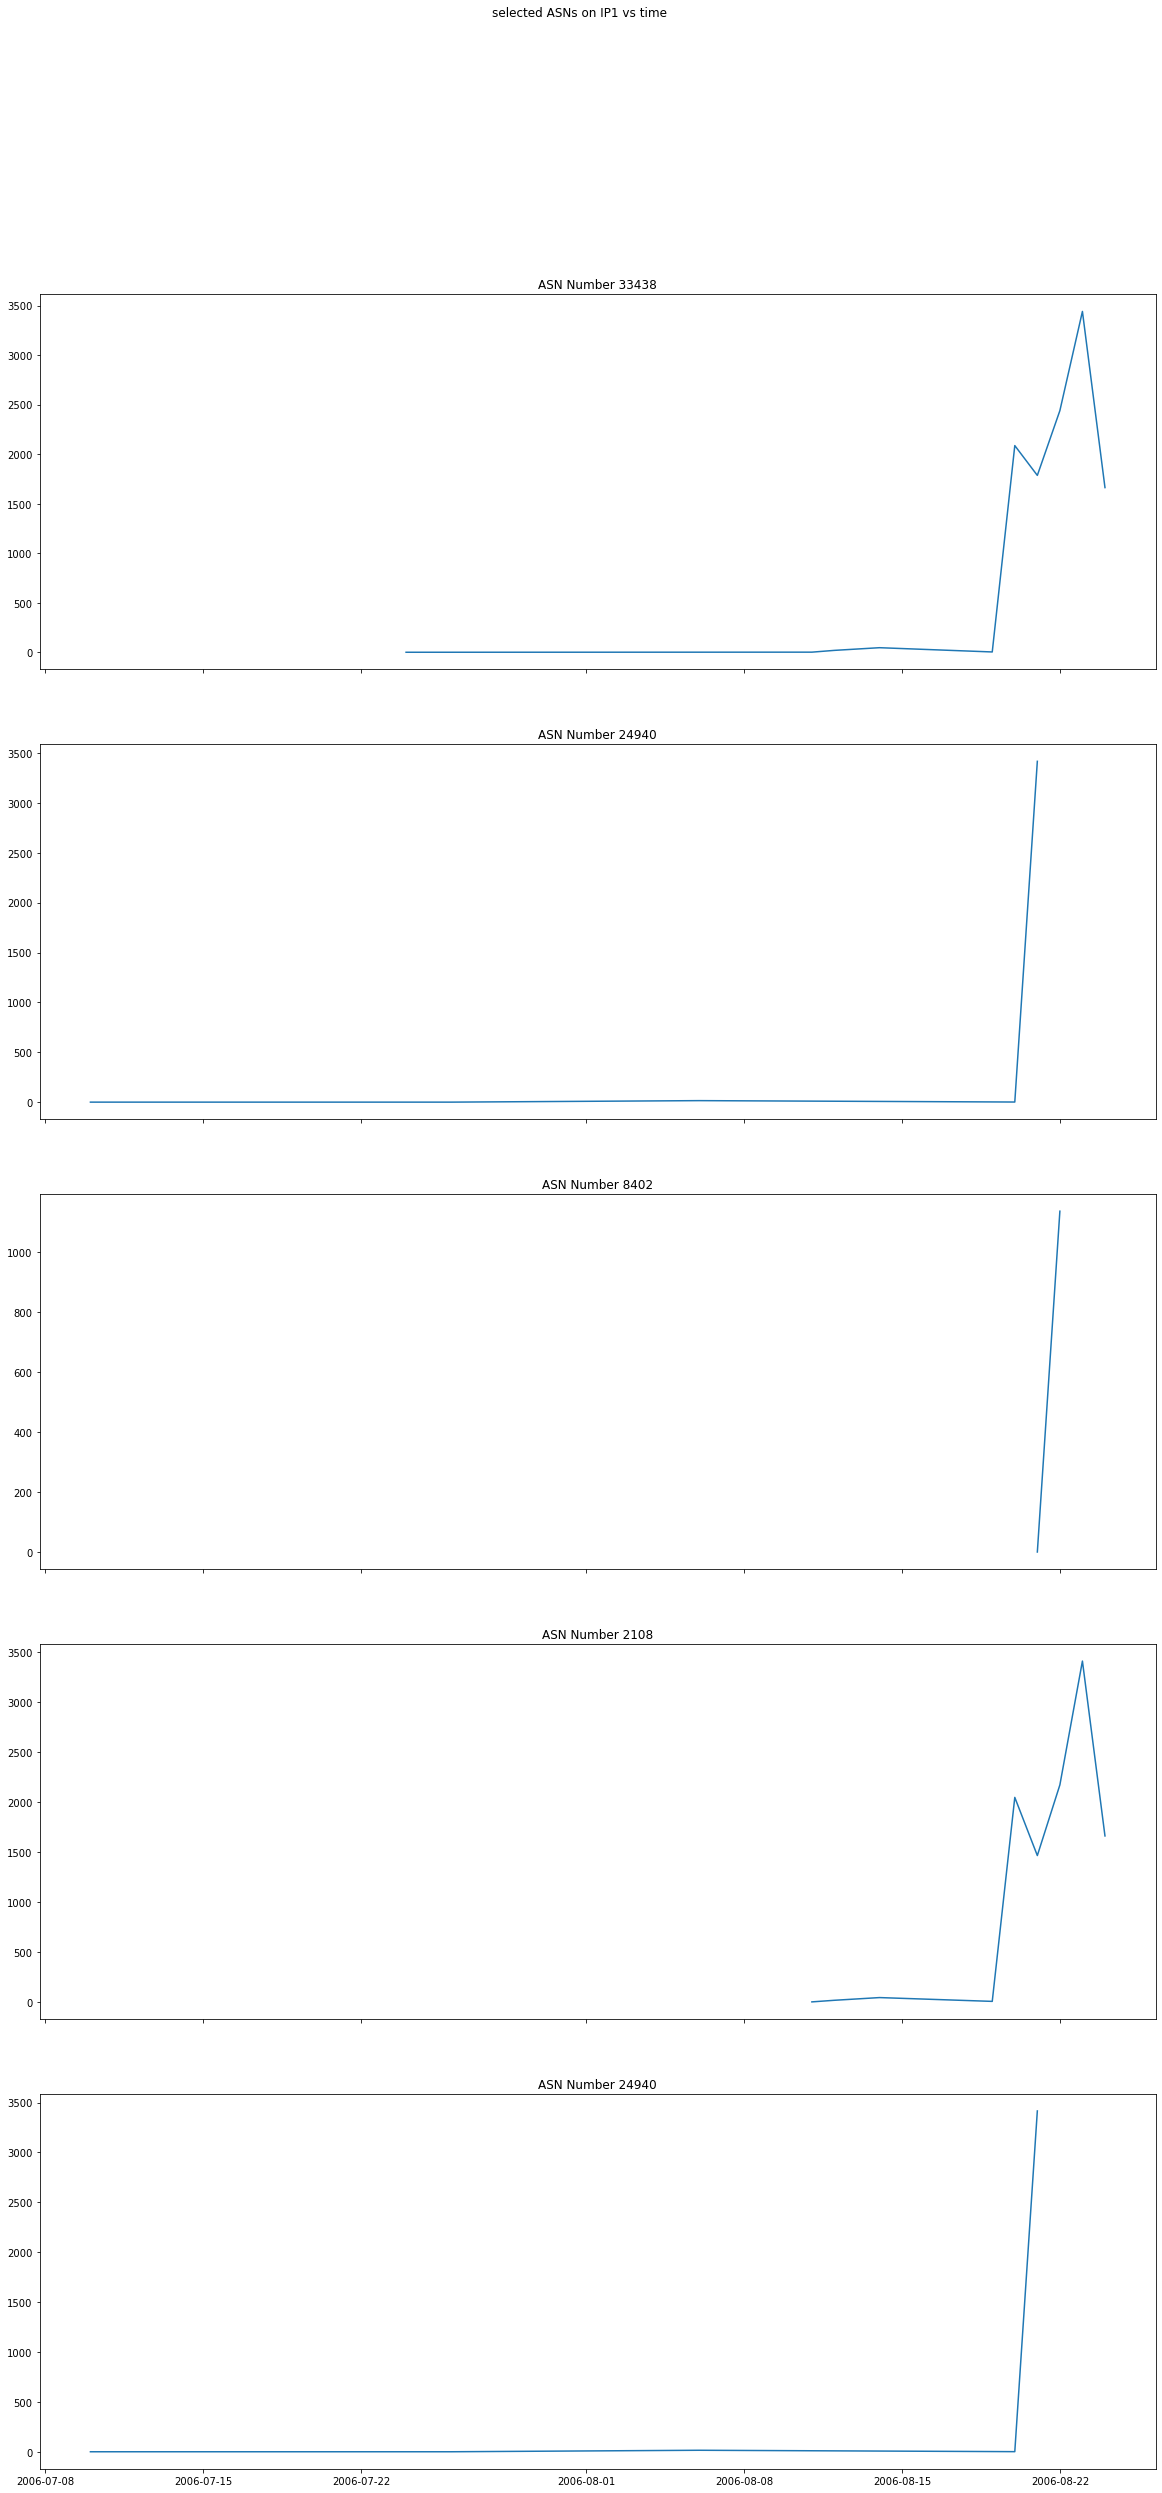

In [98]:
suspicious_asns = [33438, 24940, 8402, 2108, 24940]

fig, axs = plt.subplots(len(suspicious_asns), sharex=True, figsize=(20, 40))
fig.suptitle('selected ASNs on IP1 vs time')

for idx, asn in enumerate(suspicious_asns):
    suspect = ipn1.loc[ipn1["r_asn"] == asn]
    axs[idx].plot(suspect["date"], suspect["f"])
    axs[idx].set_title('ASN Number ' + str(asn))

In [78]:
event_1_dataframe = pd.DataFrame(columns = data["date"].unique())
for date, entry in event_1_summary.items():
    event_1_dataframe[date] = entry.values()
#     print("date: ", date)
#     for rsn, f in entry.items():
#         print(rsn, f)

In [79]:
event_1_dataframe

,2006-07-01,2006-07-02,2006-07-03,2006-07-04,2006-07-05,2006-07-06,2006-07-07,2006-07-08,2006-07-09,2006-07-10,...,2006-09-21,2006-09-22,2006-09-23,2006-09-24,2006-09-25,2006-09-26,2006-09-27,2006-09-28,2006-09-29,2006-09-30
0,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,...,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044
1,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,...,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663
2,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660,...,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660
3,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


## Key Takeaways

* When detecting anomalies by looking at previous flow, we have to use percentage difference as each IP has different regular flow
* Most anomalies arise from a sudden stop in flow
* Some anomalies arise from a sudden spike in flow
* abnormal flows tend to come from the same asn on the same day
* It is easy to identify a list of ASNs that record suspicious activity.